In [ ]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 12.4 MB/s eta 0:00:00


In [ ]:
!pip show qiskit

Name: qiskit
Version: 1.0.1
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: 
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: 


In [ ]:
!pip install qiskit-algorithms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 5.9 MB/s eta 0:00:00


In [ ]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=c5ae784eb8edba3d5b7dcd5528f415e55fe0dacef72a8c2ca98d335d901b11c6
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
import numpy as np
import pylab
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import NLocal, CCXGate, CRZGate, RXGate, TwoLocal, EfficientSU2, RealAmplitudes, QAOAAnsatz
from qiskit.circuit import Parameter
from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B, SLSQP, SPSA
from qiskit_algorithms.utils import algorithm_globals

In [ ]:
from qiskit.primitives import Estimator

estimator = Estimator()
algorithm_globals.random_seed = 50

In [ ]:
H2_op = SparsePauliOp.from_list(
    [
        ("II", -1.0523),
        ("IZ", 0.3979),
        ("ZI", -0.3979),
        ("ZZ", -0.0113),
        ("XX", 0.1809),
    ]
)

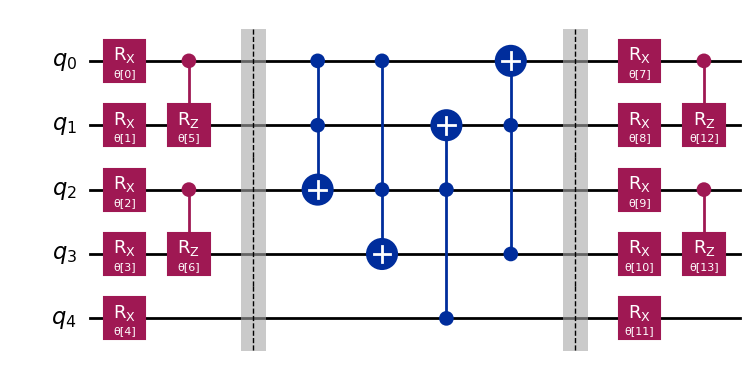

In [ ]:
theta = Parameter("θ")
ansatz = NLocal(
    num_qubits=5,
    rotation_blocks=[RXGate(theta), CRZGate(theta)],
    entanglement_blocks=CCXGate(),
    entanglement=[[0, 1, 2], [0, 2, 3], [4, 2, 1], [3, 1, 0]],
    reps=1,
    insert_barriers=True,
)
ansatz.decompose().draw("mpl")

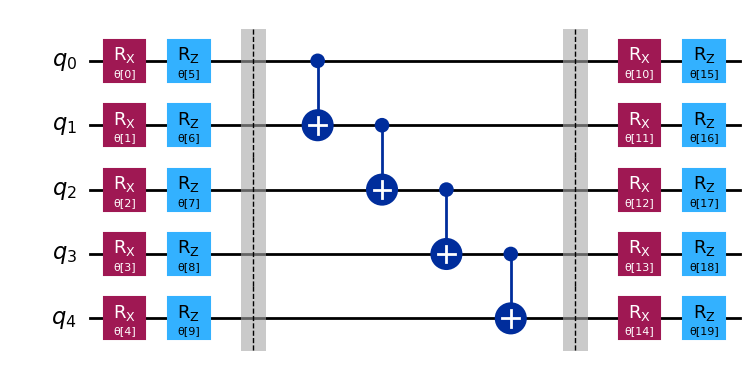

In [ ]:
ansatz = TwoLocal(
    num_qubits=5,
    rotation_blocks=["rx", "rz"],
    entanglement_blocks="cx",
    entanglement="linear",
    reps=1,
    insert_barriers=True,
)
ansatz.decompose().draw("mpl")

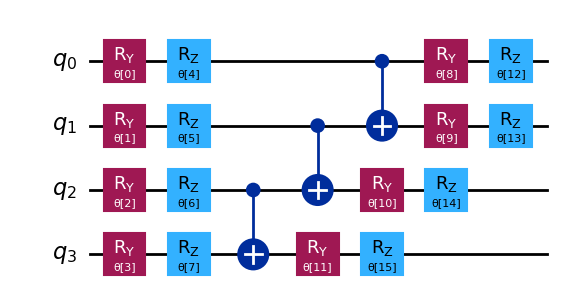

In [ ]:
ansatz = EfficientSU2(4, reps = 1)
ansatz.decompose().draw("mpl")

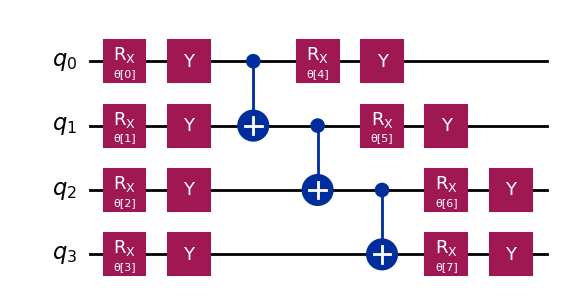

In [ ]:
ansatz = EfficientSU2(4, su2_gates=["rx", "y"], entanglement="linear", reps=1)
ansatz.decompose().draw("mpl")

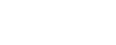

In [ ]:
ansatz = RealAmplitudes(reps=1)
ansatz.decompose().draw("mpl")

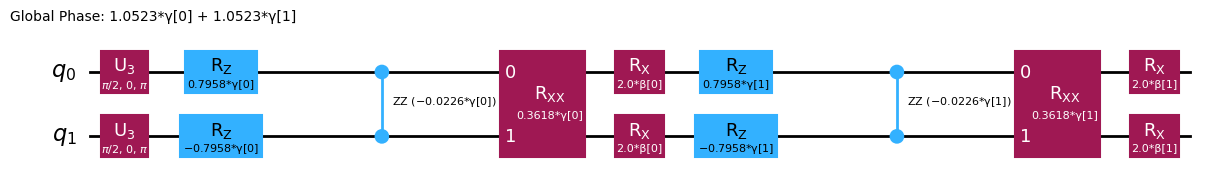

In [ ]:
qaoa_ansatz = QAOAAnsatz(H2_op, reps=2)
qaoa_ansatz.decompose(reps=3).draw("mpl")

In [ ]:
optimizers = [COBYLA(maxiter=100), L_BFGS_B(maxiter=100), SLSQP(maxiter=100), SPSA(maxiter=50)]
converge_counts = []
converge_vals = []

for optimizer in optimizers:
    ansatz = TwoLocal(rotation_blocks="ry", entanglement_blocks="cz")
    counts = []
    values = []

    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)

    vqe = VQE(estimator, ansatz, optimizer, callback=store_intermediate_result)
    result = vqe.compute_minimum_eigenvalue(operator=H2_op)
    converge_counts.append(np.asarray(counts))
    converge_vals.append(np.asarray(values))

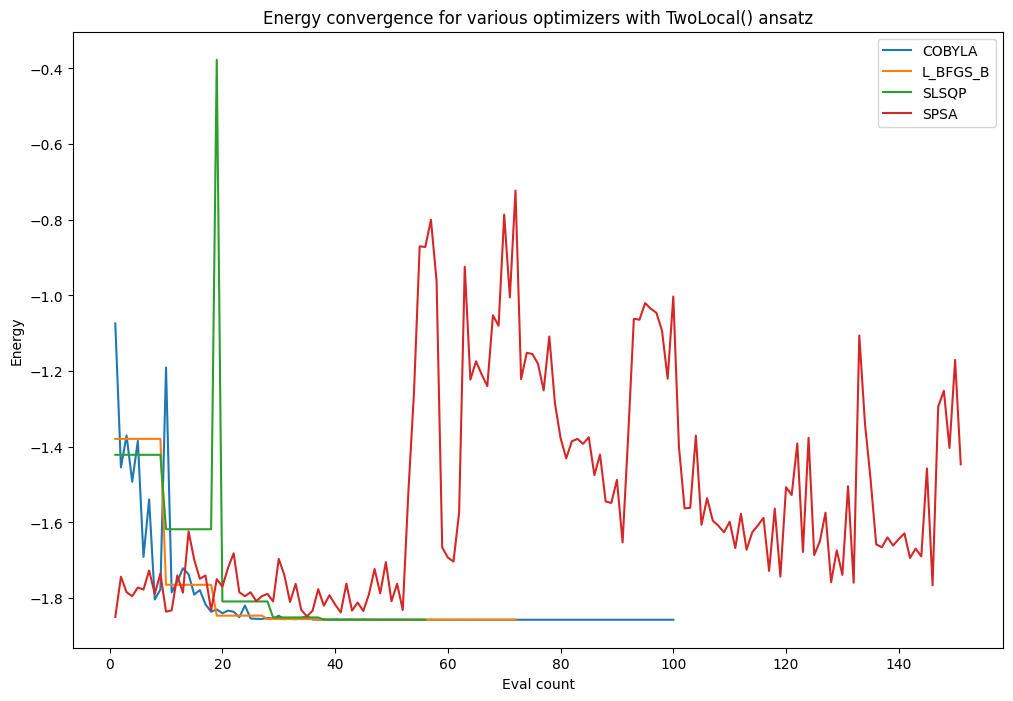

In [ ]:
pylab.rcParams["figure.figsize"] = (12, 8)
for i, optimizer in enumerate(optimizers):
    pylab.plot(converge_counts[i], converge_vals[i], label=type(optimizer).__name__)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Energy convergence for various optimizers with TwoLocal() ansatz")
pylab.legend(loc="upper right");

In [ ]:
optimizers = [COBYLA(maxiter=80), L_BFGS_B(maxiter=10), SLSQP(maxiter=10), SPSA(maxiter=20)]
converge_counts = []
converge_vals = []

for optimizer in optimizers:
    ansatz = EfficientSU2(4, reps = 1)
    counts = []
    values = []

    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)

    vqe = VQE(estimator, ansatz, optimizer, callback=store_intermediate_result)
    result = vqe.compute_minimum_eigenvalue(operator=H2_op)
    converge_counts.append(np.asarray(counts))
    converge_vals.append(np.asarray(values))

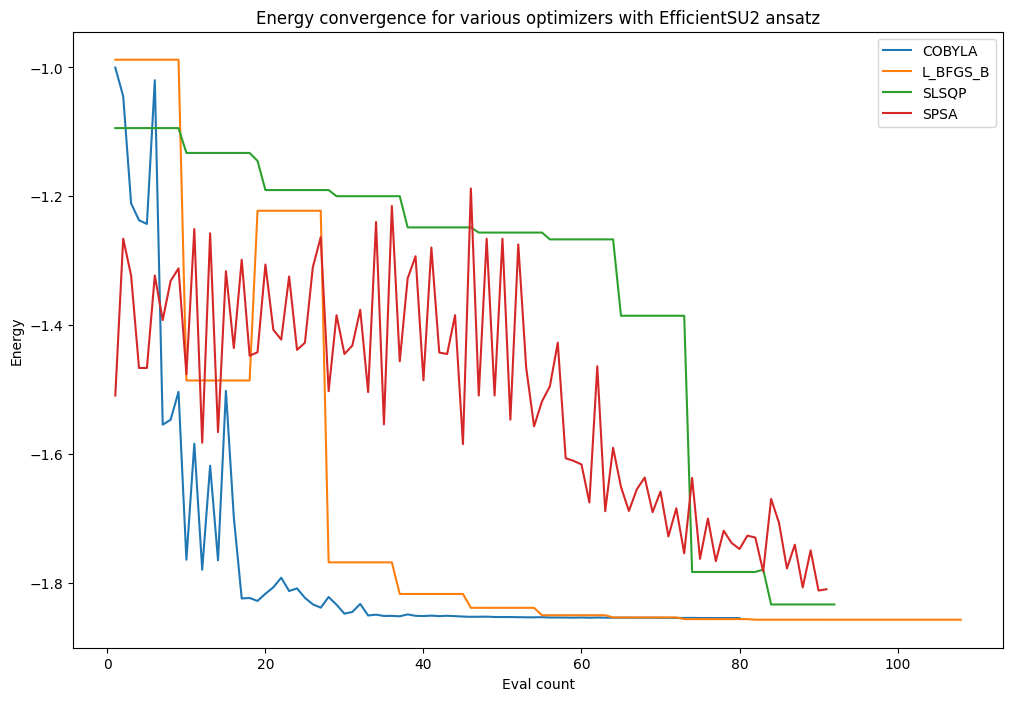

In [ ]:
pylab.rcParams["figure.figsize"] = (12, 8)
for i, optimizer in enumerate(optimizers):
    pylab.plot(converge_counts[i], converge_vals[i], label=type(optimizer).__name__)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Energy convergence for various optimizers with EfficientSU2 ansatz")
pylab.legend(loc="upper right");

In [ ]:
optimizers = [COBYLA(maxiter=100), L_BFGS_B(maxiter=80), SLSQP(maxiter=100), SPSA(maxiter=10)]
converge_counts = []
converge_vals = []

for optimizer in optimizers:
    ansatz = RealAmplitudes(reps=1)
    counts = []
    values = []

    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)

    vqe = VQE(estimator, ansatz, optimizer, callback=store_intermediate_result)
    result = vqe.compute_minimum_eigenvalue(operator=H2_op)
    converge_counts.append(np.asarray(counts))
    converge_vals.append(np.asarray(values))

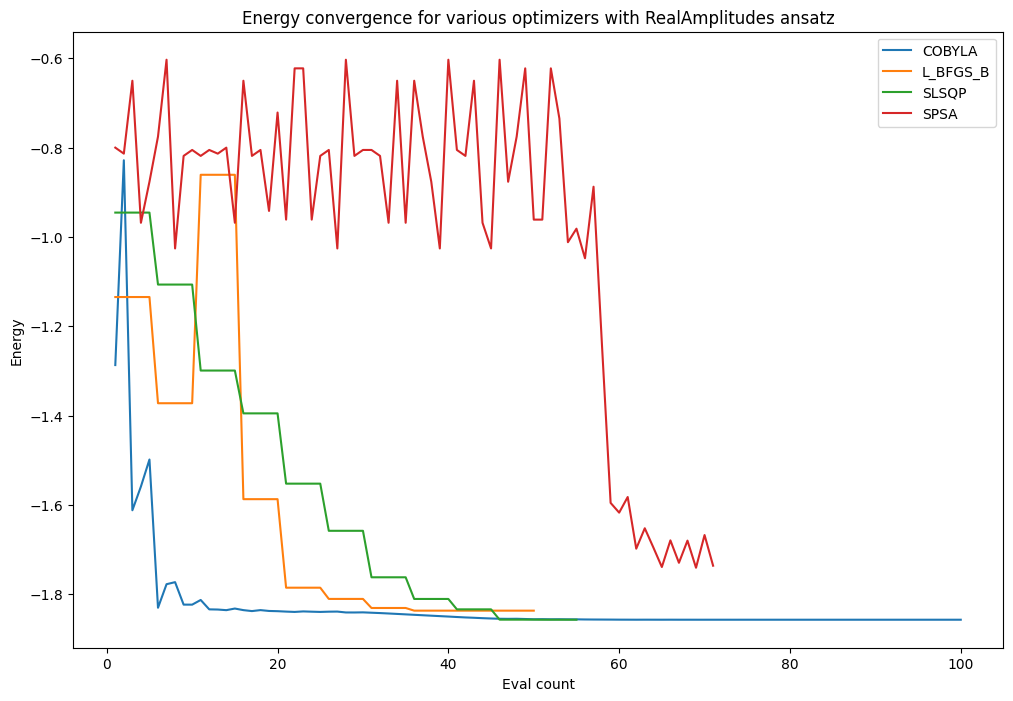

In [ ]:
pylab.rcParams["figure.figsize"] = (12, 8)
for i, optimizer in enumerate(optimizers):
    pylab.plot(converge_counts[i], converge_vals[i], label=type(optimizer).__name__)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Energy convergence for various optimizers with RealAmplitudes ansatz")
pylab.legend(loc="upper right");

In [ ]:
optimizers = [COBYLA(maxiter=100), L_BFGS_B(maxiter=30), SLSQP(maxiter=50), SPSA(maxiter=15)]
converge_counts = []
converge_vals = []

for optimizer in optimizers:
    ansatz = QAOAAnsatz(H2_op, reps=2)
    counts = []
    values = []

    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)

    vqe = VQE(estimator, ansatz, optimizer, callback=store_intermediate_result)
    result = vqe.compute_minimum_eigenvalue(operator=H2_op)
    converge_counts.append(np.asarray(counts))
    converge_vals.append(np.asarray(values))

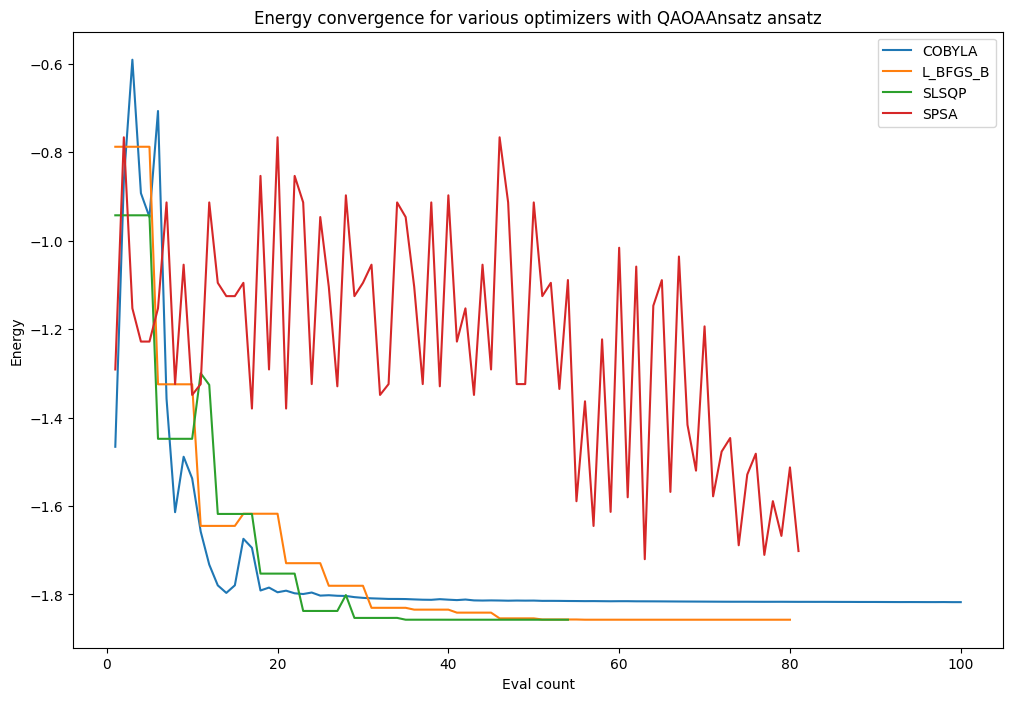

In [ ]:
pylab.rcParams["figure.figsize"] = (12, 8)
for i, optimizer in enumerate(optimizers):
    pylab.plot(converge_counts[i], converge_vals[i], label=type(optimizer).__name__)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Energy convergence for various optimizers with QAOAAnsatz ansatz")
pylab.legend(loc="upper right");

In [ ]:
ansatzs = [TwoLocal(rotation_blocks="ry", entanglement_blocks="cz"),
           EfficientSU2(4, reps = 1),
           RealAmplitudes(reps=1),
           QAOAAnsatz(H2_op, reps=2) ]
converge_counts = []
converge_vals = []

for ansatz in ansatzs:
    ansatz = TwoLocal(rotation_blocks="ry", entanglement_blocks="cz")
    optimizer = COBYLA(maxiter=40)
    counts = []
    values = []

    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)

    vqe = VQE(estimator, ansatz, optimizer, callback=store_intermediate_result)
    result = vqe.compute_minimum_eigenvalue(operator=H2_op)
    converge_counts.append(np.asarray(counts))
    converge_vals.append(np.asarray(values))

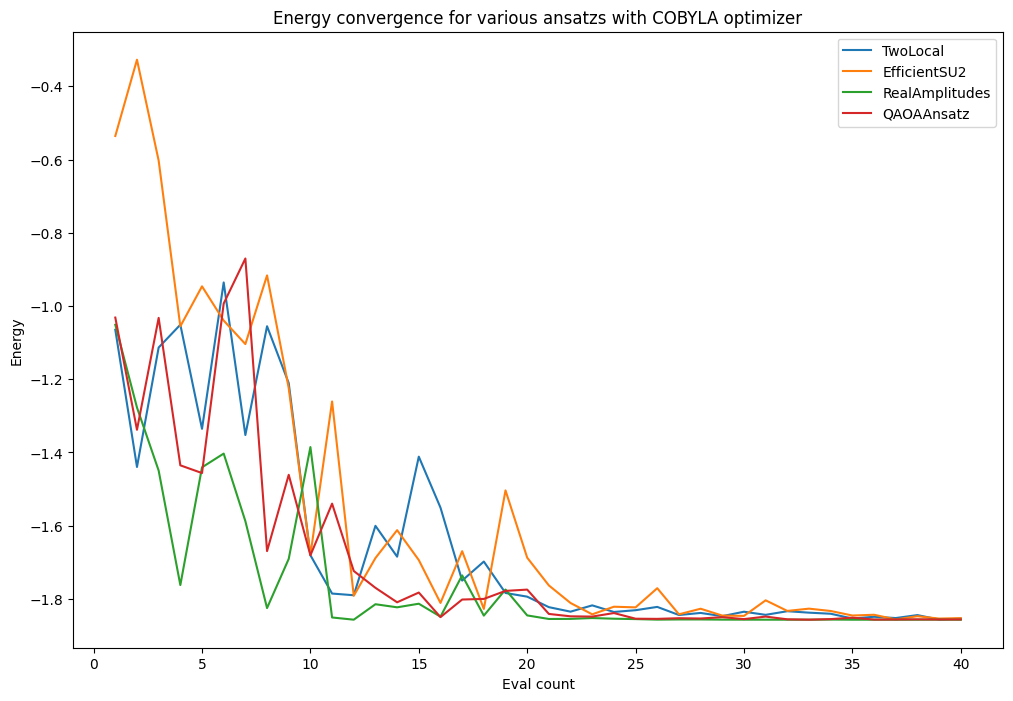

In [ ]:
pylab.rcParams["figure.figsize"] = (12, 8)
for i, ansatz in enumerate(ansatzs):
    pylab.plot(converge_counts[i], converge_vals[i], label=type(ansatz).__name__)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Energy convergence for various ansatzs with COBYLA optimizer")
pylab.legend(loc="upper right");

In [ ]:
ansatzs = [TwoLocal(rotation_blocks="ry", entanglement_blocks="cz"),
           EfficientSU2(4, reps = 1),
           RealAmplitudes(reps=1),
           QAOAAnsatz(H2_op, reps=2) ]
converge_counts = []
converge_vals = []

for ansatz in ansatzs:
    ansatz = TwoLocal(rotation_blocks="ry", entanglement_blocks="cz")
    optimizer = L_BFGS_B(maxiter=20)
    counts = []
    values = []

    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)

    vqe = VQE(estimator, ansatz, optimizer, callback=store_intermediate_result)
    result = vqe.compute_minimum_eigenvalue(operator=H2_op)
    converge_counts.append(np.asarray(counts))
    converge_vals.append(np.asarray(values))

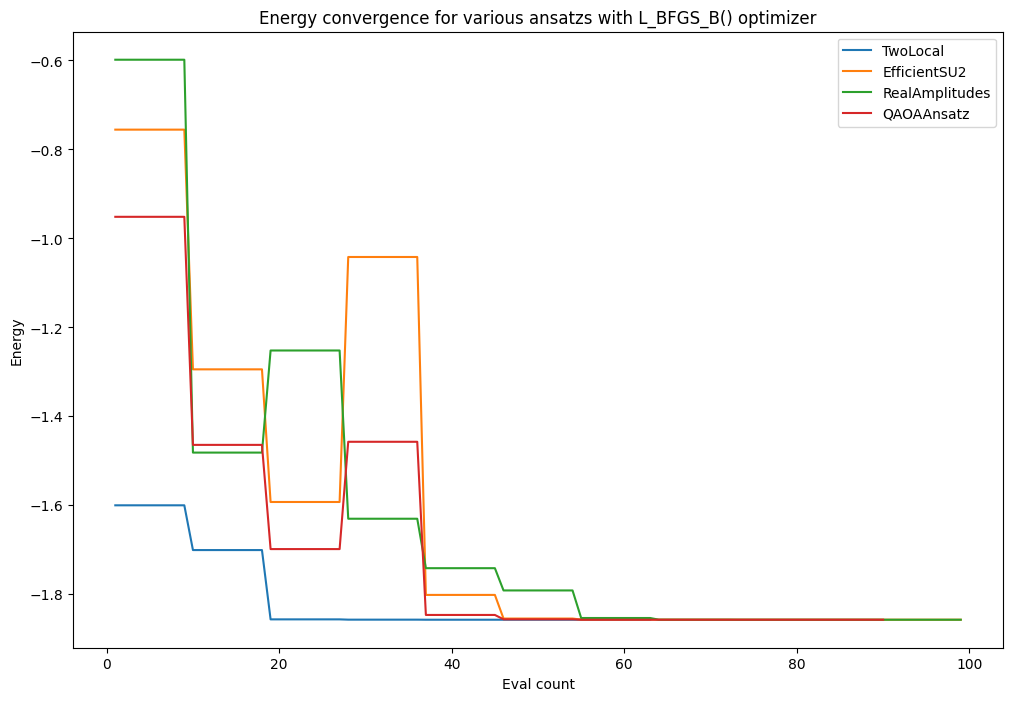

In [ ]:
pylab.rcParams["figure.figsize"] = (12, 8)
for i, ansatz in enumerate(ansatzs):
    pylab.plot(converge_counts[i], converge_vals[i], label=type(ansatz).__name__)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Energy convergence for various ansatzs with L_BFGS_B() optimizer")
pylab.legend(loc="upper right");

In [ ]:
ansatzs = [TwoLocal(rotation_blocks="ry", entanglement_blocks="cz"),
           EfficientSU2(4, reps = 1),
           RealAmplitudes(reps=1),
           QAOAAnsatz(H2_op, reps=2) ]
converge_counts = []
converge_vals = []

for ansatz in ansatzs:
    ansatz = TwoLocal(rotation_blocks="ry", entanglement_blocks="cz")
    optimizer = SLSQP(maxiter=50)
    counts = []
    values = []

    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)

    vqe = VQE(estimator, ansatz, optimizer, callback=store_intermediate_result)
    result = vqe.compute_minimum_eigenvalue(operator=H2_op)
    converge_counts.append(np.asarray(counts))
    converge_vals.append(np.asarray(values))

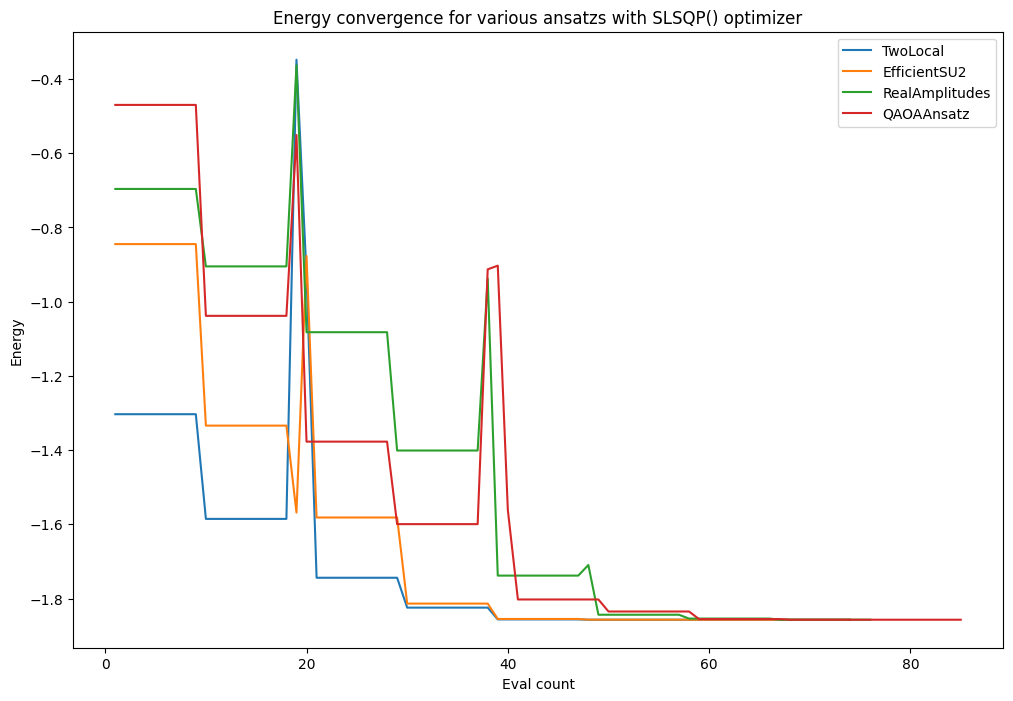

In [ ]:
pylab.rcParams["figure.figsize"] = (12, 8)
for i, ansatz in enumerate(ansatzs):
    pylab.plot(converge_counts[i], converge_vals[i], label=type(ansatz).__name__)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Energy convergence for various ansatzs with SLSQP() optimizer")
pylab.legend(loc="upper right");

In [ ]:
ansatzs = [TwoLocal(rotation_blocks="ry", entanglement_blocks="cz"),
           EfficientSU2(4, reps = 1),
           RealAmplitudes(reps=1),
           QAOAAnsatz(H2_op, reps=2) ]
converge_counts = []
converge_vals = []

for ansatz in ansatzs:
    ansatz = TwoLocal(rotation_blocks="ry", entanglement_blocks="cz")
    optimizer = SPSA(maxiter=30)
    counts = []
    values = []

    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)

    vqe = VQE(estimator, ansatz, optimizer, callback=store_intermediate_result)
    result = vqe.compute_minimum_eigenvalue(operator=H2_op)
    converge_counts.append(np.asarray(counts))
    converge_vals.append(np.asarray(values))

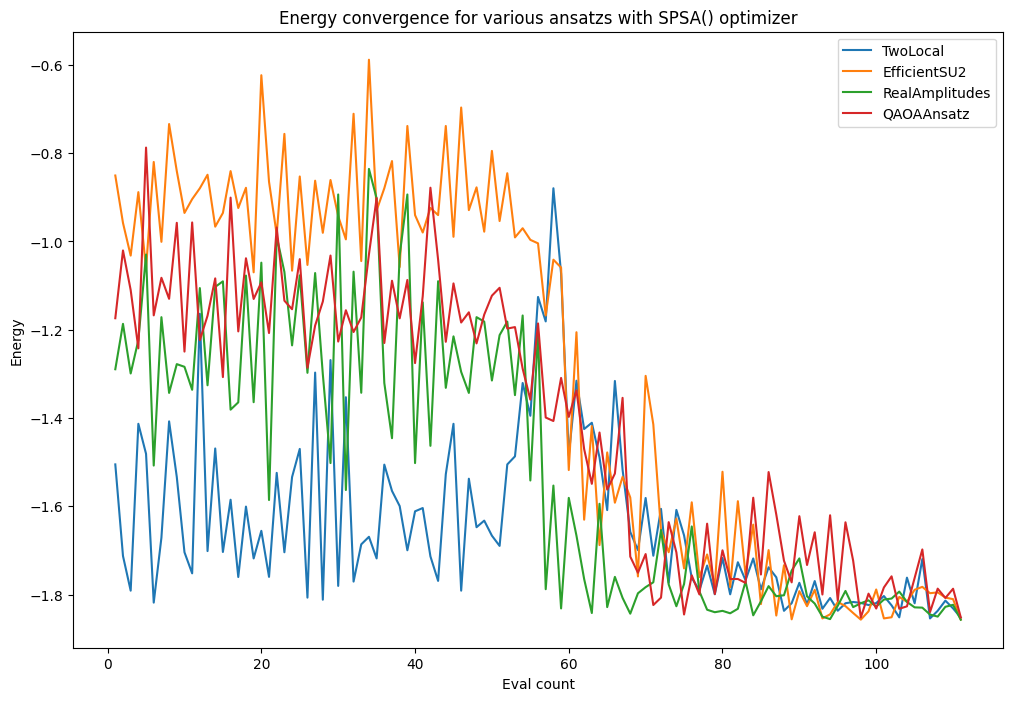

In [ ]:
pylab.rcParams["figure.figsize"] = (12, 8)
for i, ansatz in enumerate(ansatzs):
    pylab.plot(converge_counts[i], converge_vals[i], label=type(ansatz).__name__)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Energy convergence for various ansatzs with SPSA() optimizer")
pylab.legend(loc="upper right")